In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cardiacarrestriskprediction/Cardiac_Arrest_Participants_Data/Sample_Submission.xlsx
/kaggle/input/cardiacarrestriskprediction/Cardiac_Arrest_Participants_Data/Test.csv
/kaggle/input/cardiacarrestriskprediction/Cardiac_Arrest_Participants_Data/Train.csv


In [2]:
train = pd.read_csv('/kaggle/input/cardiacarrestriskprediction/Cardiac_Arrest_Participants_Data/Train.csv')
test = pd.read_csv('/kaggle/input/cardiacarrestriskprediction/Cardiac_Arrest_Participants_Data/Test.csv')
sample_sub = pd.read_excel('/kaggle/input/cardiacarrestriskprediction/Cardiac_Arrest_Participants_Data/Sample_Submission.xlsx')

In [3]:
train.shape, test.shape, sample_sub.shape

((889, 13), (382, 12), (382, 2))

In [4]:
train.head(3)

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,1,1,1,0,1,0,0,0,1,0,0,0,no
1,1,0,1,0,1,0,0,0,1,0,0,0,no
2,1,0,1,0,1,0,0,0,1,0,0,0,no


In [5]:
train.nunique()

Gender                             3
Chain_smoker                       2
Consumes_other_tobacco_products    2
HighBP                             2
Obese                              2
Diabetes                           2
Metabolic_syndrome                 2
Use_of_stimulant_drugs             2
Family_history                     2
History_of_preeclampsia            2
CABG_history                       2
Respiratory_illness                2
UnderRisk                          2
dtype: int64

In [6]:
test.nunique()

Gender                             3
Chain_smoker                       2
Consumes_other_tobacco_products    2
HighBP                             2
Obese                              2
Diabetes                           2
Metabolic_syndrome                 2
Use_of_stimulant_drugs             2
Family_history                     2
History_of_preeclampsia            2
CABG_history                       2
Respiratory_illness                2
dtype: int64

In [7]:
train['Gender'].value_counts()

1    607
2    256
0     26
Name: Gender, dtype: int64

In [8]:
train['UnderRisk'].value_counts()

no     699
yes    190
Name: UnderRisk, dtype: int64

In [9]:
train['UnderRisk'] = train['UnderRisk'].map({'yes':1, 'no':0})
train['UnderRisk'].value_counts()

0    699
1    190
Name: UnderRisk, dtype: int64

In [10]:
train.describe()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
count,889.000000,889.000000,889.00000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,1.258718,0.120360,0.83802,0.086614,0.919010,0.055118,0.042745,0.082115,0.925759,0.017998,0.021372,0.032621,0.213723
std,0.500557,0.325565,0.36864,0.281427,0.272973,0.228339,0.202395,0.274694,0.262310,0.133018,0.144704,0.177742,0.410164
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


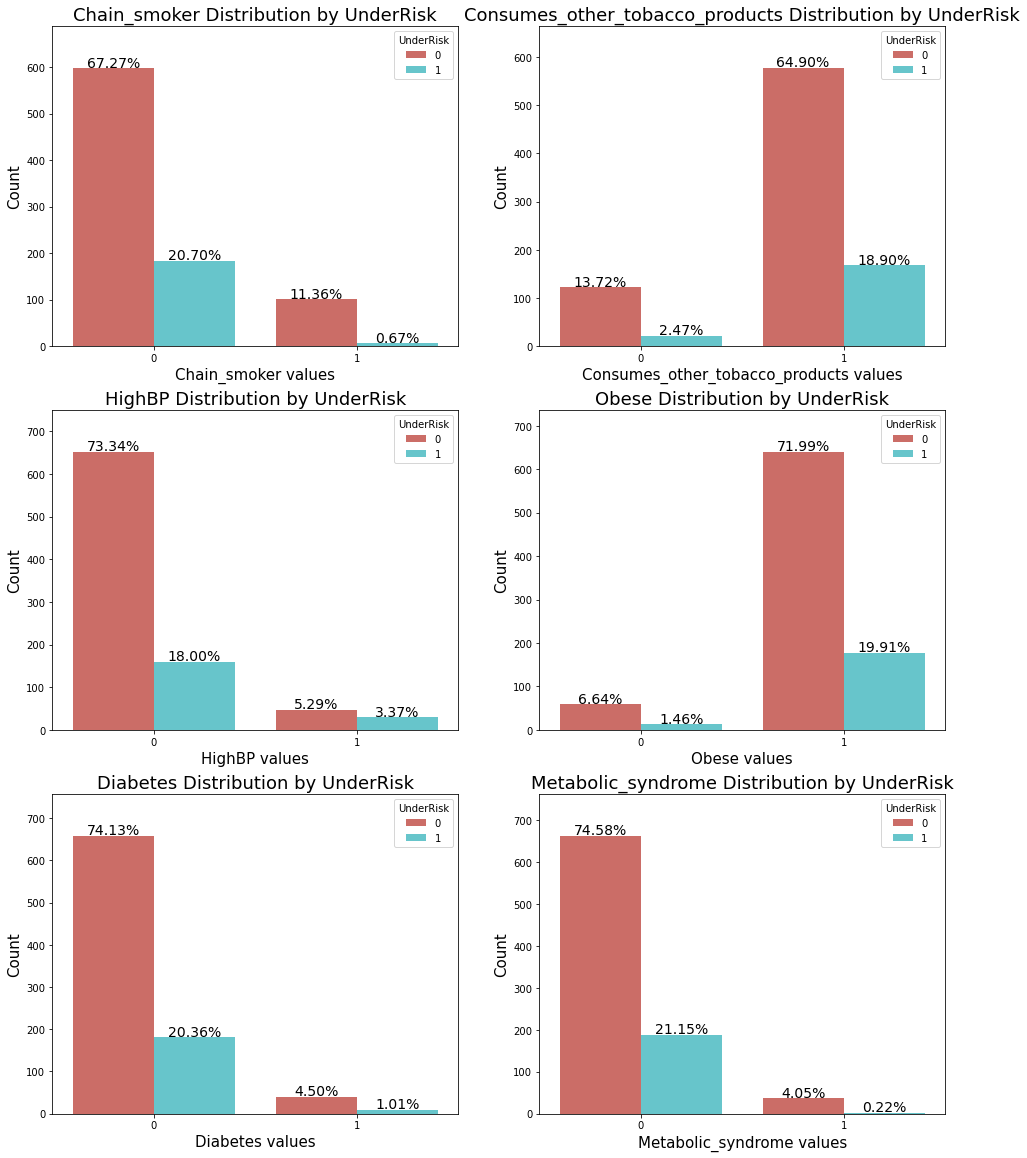

In [11]:
bin_cols = ['Chain_smoker', 'Consumes_other_tobacco_products', 'HighBP', 'Obese', 'Diabetes', 'Metabolic_syndrome']

import matplotlib.gridspec as gridspec # to do the grid of plots
grid = gridspec.GridSpec(3, 2) # The grid of chart
plt.figure(figsize=(16,20)) # size of figure

total = len(train)

# loop to get column and the count of plots
for n, col in enumerate(train[bin_cols]): 
    ax = plt.subplot(grid[n]) # feeding the figure of grid
    sns.countplot(x=col, data=train, hue='UnderRisk', palette='hls') 
    ax.set_ylabel('Count', fontsize=15) # y axis label
    ax.set_title(f'{col} Distribution by UnderRisk', fontsize=18) # title label
    ax.set_xlabel(f'{col} values', fontsize=15) # x axis label
    sizes=[] # Get highest values in y
    for p in ax.patches: # loop to all objects
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=14) 
    ax.set_ylim(0, max(sizes) * 1.15) # set y limit based on highest heights
    
plt.show()

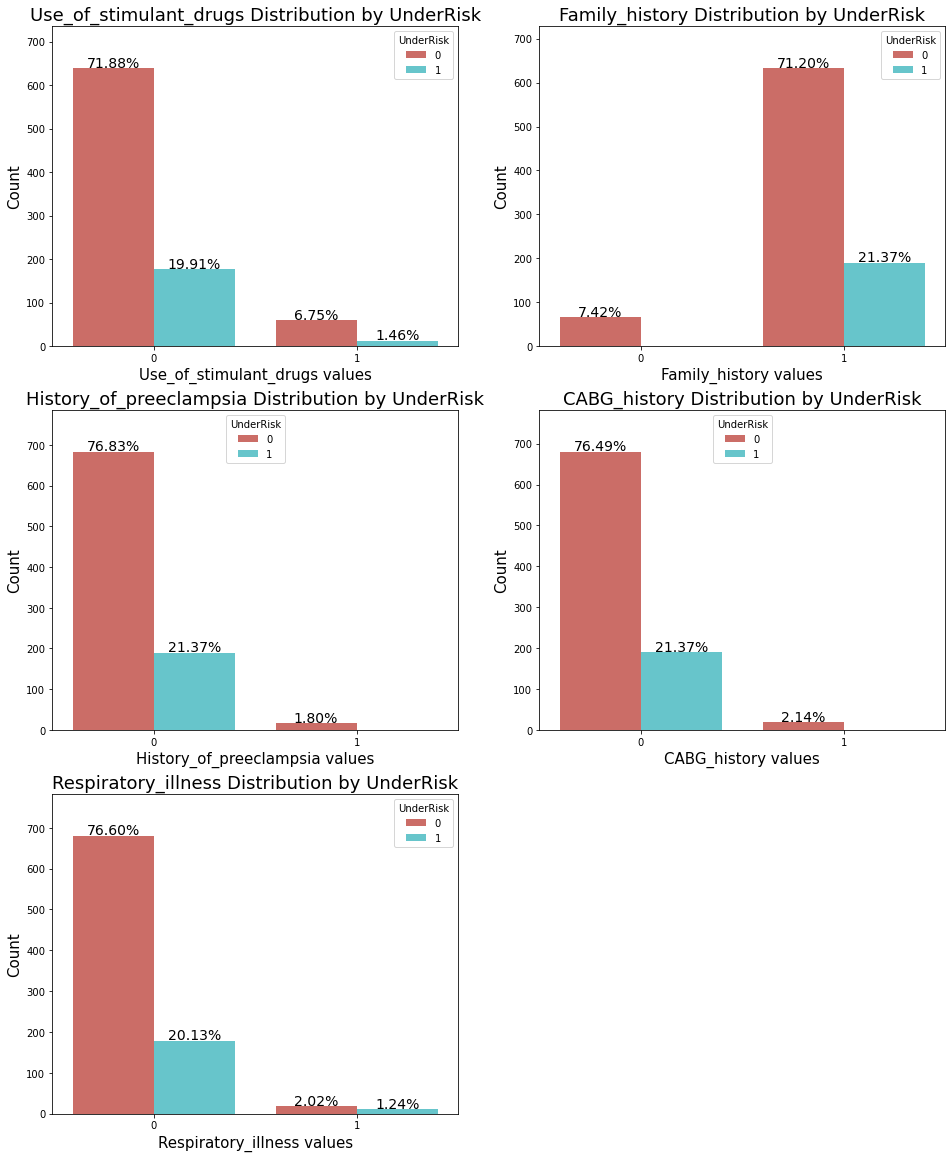

In [12]:
bin_cols = ['Use_of_stimulant_drugs', 'Family_history', 'History_of_preeclampsia', 'CABG_history', 'Respiratory_illness']

import matplotlib.gridspec as gridspec # to do the grid of plots
grid = gridspec.GridSpec(3, 2) # The grid of chart
plt.figure(figsize=(16,20)) # size of figure

total = len(train)

# loop to get column and the count of plots
for n, col in enumerate(train[bin_cols]): 
    ax = plt.subplot(grid[n]) # feeding the figure of grid
    sns.countplot(x=col, data=train, hue='UnderRisk', palette='hls') 
    ax.set_ylabel('Count', fontsize=15) # y axis label
    ax.set_title(f'{col} Distribution by UnderRisk', fontsize=18) # title label
    ax.set_xlabel(f'{col} values', fontsize=15) # x axis label
    sizes=[] # Get highest values in y
    for p in ax.patches: # loop to all objects
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=14) 
    ax.set_ylim(0, max(sizes) * 1.15) # set y limit based on highest heights
    
plt.show()

In [13]:
X = train.drop(labels=['UnderRisk'], axis=1)
y = train['UnderRisk'].values

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

In [14]:
import lightgbm as lgb
from sklearn.metrics import log_loss

In [15]:
Xtest = test

In [21]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

err_lgb = []
y_pred_tot_lgb = []

fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)

for train_index, test_index in fold.split(X, y):
    
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = XGBClassifier(random_state=2, learning_rate=0.05, subsample=0.8, max_depth=4, gamma=0.1)
    clf.fit(X_train, y_train)

    y_pred = clf.predict_proba(X_test)
         
    print("Log Loss:", log_loss(y_test, y_pred))

    err_lgb.append(log_loss(y_test, y_pred))
    p = clf.predict_proba(Xtest)
    y_pred_tot_lgb.append(p)

Log Loss: 0.5002139904693271
Log Loss: 0.48836052957712933
Log Loss: 0.5263342412628149
Log Loss: 0.46834808883121176
Log Loss: 0.4634676555569252
Log Loss: 0.46382860751466803
Log Loss: 0.4233277804856555
Log Loss: 0.46277549419175373
Log Loss: 0.4961012885644195
Log Loss: 0.47182976674627175


In [22]:
np.mean(err_lgb, 0)

0.47645874432001767

In [23]:
y_pred = np.mean(y_pred_tot_lgb, 0)

In [24]:
sub = pd.DataFrame(y_pred)
sub.columns = ['no','yes']
sub.head(5)

,no,yes
0,0.501344,0.498656
1,0.720781,0.279219
2,0.933769,0.066231
3,0.860204,0.139796
4,0.685088,0.314912


In [25]:
sub.to_excel('Output.xlsx', index=False)